# cog scores (Jana)





**cognitive domains**

* For each subject, the standardized subtest measures corresponding to a defined cognitive domain were averaged

* The classification of tests to domains were based on suggestions from DSM-5 and other 
publications (let me know if you need references on that)
    * Attention (Processing speed): Trail making test (TMT) part A reaction time (RT), TMT
part A errors, Stroop neutral RT, Stroop neutral performance
    * Executive function: Stroop RT incongruent/neutral, TMT RT part B/RT part A
    * Memory: CERAD wordlist sum items trials 1-3; CERAD wordlist items trial 1,2,3;
CERAD figure copy delayed recall, CERAD wordlist delayed recall, CERAD wordlist
recognition, CERAD wordlist trial 3/delayed recall
    * Verbal fluency: phonematic fluency (S-words, OLD SAMPLE ONLY), semantic fluency (animals)

* furthermore, but not included here, because some not available for young
    * Visuoconstruction: CERAD figure copy
    * Language: BNT sum
    * Social cognition: Reading the Mind in the Eyes test (% correct)




**Standardization procedure Age & Sex**
* normalizes the cognitive performance according to sex and age
* this procedure is suited for a classification of cognitive state because:
    * cognitive performance of most domains typically is declines with age
    * for some measures, an effect of sex has been found
    * the LIFE cohort comprises an unequal number of participants per age group (is biased
towards older age groups)
    * the DSM-5 suggests to evaluate individual cognitive performance in relation to persons
of the same age, sex (and education) background

* Due to the low number of individuals in the young age groups and to ensure that for each
measure includes an appropriate number of subjects (least around 100 male/female individuals), age groups were merged together (14 groups in total – 7 male and 7 female age groups)
    * 19-39
    * 40-49
    * 50-59
    * 60-64
    * 65-69
    * 70-74
    * 75+
    


**Cognitive domain score computation**
* for each group (age & sex), the measures of the subtest were z-standardize to the mean of
the corresponding sample (M=0, SD=1)
* except verbal fluency, all domains are suggested by the DSM-5 to be considered in the evaluation of the cognitive profile for diagnostics of Neurocognitive Disorder (NCD)
* verbal fluency was added as a separate entity, since there is recent evidence that
    * it largely overlaps with various cognitive functions (executive functions, memory,
language) and therefor is not easily classified among one or the other
    * it serves as an independent marker of cognitive decline
    * may have independent neural underpinnings
 
 
**Objective impairment**
* DSM-5 cut-off scores/intervals were used
    * no: all scores in the normal range (>-1 SD) → 0
    * mild NCD: at least 1 score in the range between -1 and -2 SD → 1
    * major NCD: at least 1 score <-2 SD → 2
    
    
**DSM-5 NCD status**
* 0 → no SCI & no objective impairment → normal
* 1 → SCI & no objective impairment → SCI (no DSM-5 category)
* 2 → SCI & mild NCD → mild NCD
* 3 → SCI & major NCD → major NCD
* 4 → no SCI but mild OR major NCD → non-awareness (no DSM-5 category)

In [1]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
from matplotlib import pylab as plt
from scipy.stats.mstats import zscore
import numpy as np

In [2]:
data_root_path = '/Users/franzliem/Dropbox/LeiCA/LIFE/behavioral/data/Jana_20160429'

In [3]:
df_agenorm = pd.read_csv(os.path.join(data_root_path, 'CogState_Alter_Geschlecht_20160418.csv'), index_col=0, na_values=[99,999])
df_agenorm.rename(columns={'CS_attention': 'CS_attention_agenorm', 
                           'CS_executive': 'CS_executive_agenorm',
                           'CS_memory': 'CS_memory_agenorm',
                           'CS_fluency': 'CS_fluency_agenorm',
                           'CS_viscon': 'CS_viscon_agenorm',
                           'CS_language':'CS_language_agenorm',
                           'CS_socog': 'CS_socog_agenorm'}, inplace=True)
df_agenorm.index.name = 'SIC'
df_agenorm = df_agenorm[['age', 'Geschlecht','CS_attention_agenorm', 'CS_executive_agenorm',
             'CS_memory_agenorm',  'CS_fluency_agenorm']]
df_agenorm.head()
df_agenorm.shape


df_samplenorm = pd.read_csv(os.path.join(data_root_path, 'CogState_whole_sample_20160429.csv'), index_col=0, na_values=[99,999])
df_samplenorm = df_samplenorm[['CS_attention', 'CS_executive',
                               'CS_memory',  'CS_fluency']]
df_samplenorm.index.name = 'SIC'

In [4]:
df_agenorm.columns.values


array(['age', 'Geschlecht', 'CS_attention_agenorm', 'CS_executive_agenorm',
       'CS_memory_agenorm', 'CS_fluency_agenorm'], dtype=object)

reduce to subjects with 'CS_attention', 'CS_executive',
 'CS_memory',  'CS_fluency'

In [5]:
df = df_agenorm.copy()
df = df.join(df_samplenorm)
print(df.shape)
df = df.dropna()
print(df.shape)

(2751, 10)
(2583, 10)


# calculate cs mean and groups for agenorm

In [6]:
selected_tests = ['CS_attention_agenorm', 'CS_executive_agenorm', 'CS_memory_agenorm',
                    'CS_fluency_agenorm']
df['cs_mean_agenorm'] = df[selected_tests].mean(1)
df['cs_mean_z_agenorm'] = zscore(df['cs_mean_agenorm'])

cs_4_doms_agenorm = df[selected_tests]
df['n_mild_agenorm'] = 0
df['n_mild_agenorm'] =  np.sum(np.logical_and((cs_4_doms_agenorm < -1), (cs_4_doms_agenorm > -2)), axis=1)
df['n_major_agenorm'] = 0
df['n_major_agenorm'] =  np.sum(cs_4_doms_agenorm < -2, axis=1)

df['cs_group_agenorm'] = 'norm'
df.ix[df.n_mild_agenorm>0, 'cs_group_agenorm'] = 'mild'
df.ix[df.n_major_agenorm>0, 'cs_group_agenorm'] = 'major'
df['cs_group_agenorm_int'] = df['cs_group_agenorm'].replace({'norm': 0, 'mild': 1, 'major':2})


# calculate cs mean and groups for samplenorm

In [7]:
selected_tests = ['CS_attention', 'CS_executive', 'CS_memory','CS_fluency']
df['cs_mean'] = df[selected_tests].mean(1)
df['cs_mean_z'] = zscore(df['cs_mean'])

cs_4_doms = df[selected_tests]
df['n_mild'] = 0
df['n_mild'] =  np.sum(np.logical_and((cs_4_doms < -1), (cs_4_doms > -2)), axis=1)
df['n_major'] = 0
df['n_major'] =  np.sum(cs_4_doms < -2, axis=1)

df['cs_group'] = 'norm'
df.ix[df.n_mild>0, 'cs_group'] = 'mild'
df.ix[df.n_major>0, 'cs_group'] = 'major'
df['cs_group_int'] = df['cs_group'].replace({'norm': 0, 'mild': 1, 'major':2})


In [8]:
#df.head()

# SAVE DATA

In [9]:
df.to_pickle(os.path.join(data_root_path, 'CogState_20160504.pkl'))


# between domain correlations

In [10]:
df_corr = df[['age', 'cs_mean_z', 'CS_attention', 'CS_executive', 'CS_memory',  'CS_fluency']]
c = df_corr.corr()
#c

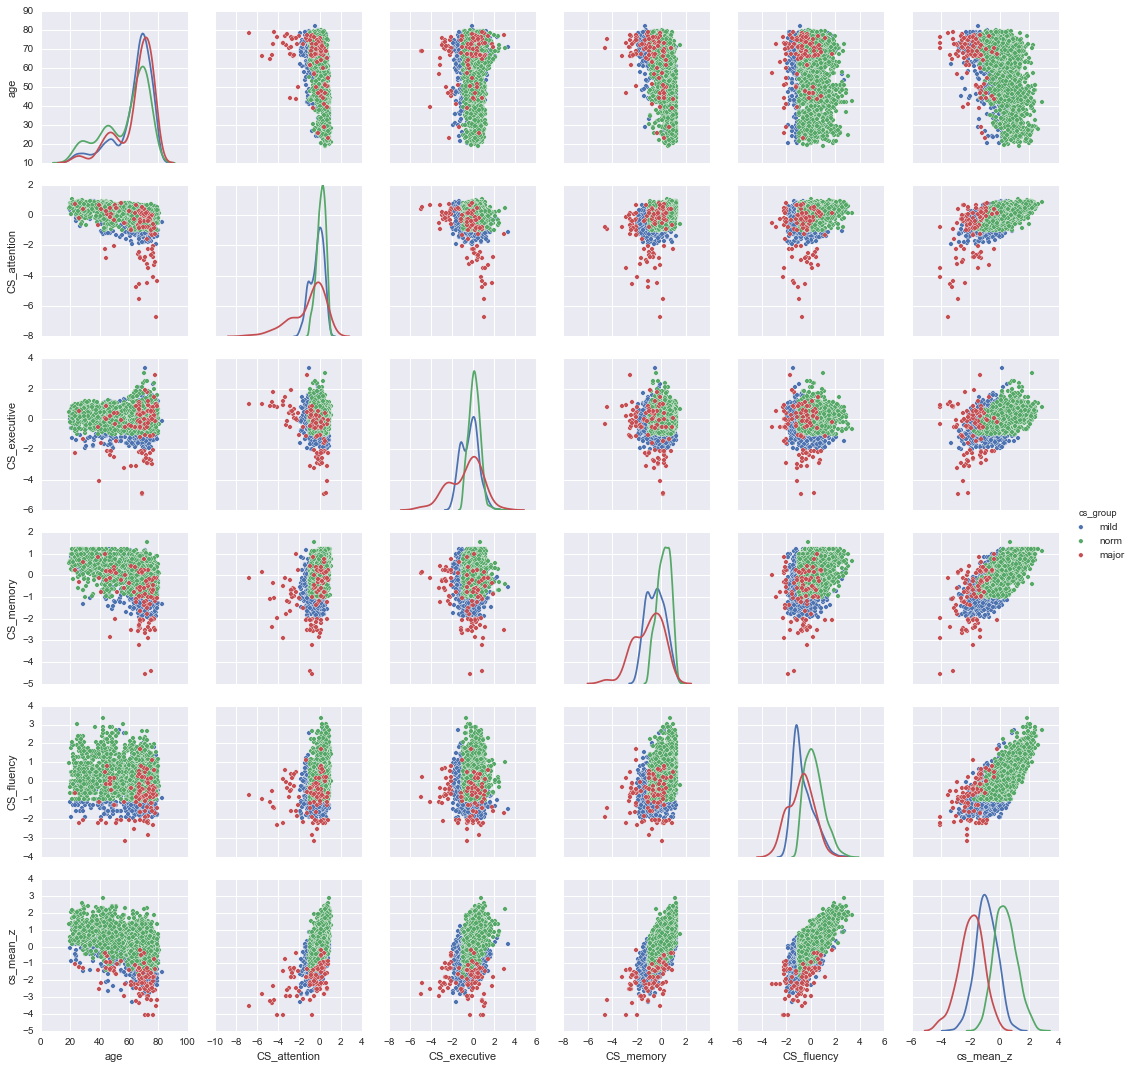

In [11]:
v=['age', 'CS_attention', 'CS_executive', 'CS_memory',
       'CS_fluency', 'cs_mean_z']
sns.pairplot(df, x_vars=v, y_vars=v,  hue='cs_group', diag_kind='kde') #['age', 'cs_mean_z']

# grouping

In [12]:
co = df.groupby('cs_group')['age'].count()
co

cs_group
major      95
mild      604
norm     1884
Name: age, dtype: int64

In [13]:
df.to_clipboard()